# Шикунов Николай 172

Я взял историю цены акций Tesla https://finance.yahoo.com/quote/TSLA/

Временной ряд интересен своим пузырём в 2020 году

История цены ежедневна с 2010 года. Чтобы увеличить кол-во точек я разбил день на 2 части: цена открытия и цена закрытия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.2f}'.format

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('tesla_data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900


In [4]:
df['Date_end'] = df.Date

In [5]:
df.Date += '-10'
df.Date_end += '-19'

In [6]:
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d-%H')
df.Date_end = pd.to_datetime(df.Date_end, format='%Y-%m-%d-%H')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_end
0,2010-06-29 10:00:00,19.00,25.00,17.54,23.89,23.89,18766300,2010-06-29 19:00:00
1,2010-06-30 10:00:00,25.79,30.42,23.30,23.83,23.83,17187100,2010-06-30 19:00:00
2,2010-07-01 10:00:00,25.00,25.92,20.27,21.96,21.96,8218800,2010-07-01 19:00:00
3,2010-07-02 10:00:00,23.00,23.10,18.71,19.20,19.20,5139800,2010-07-02 19:00:00
4,2010-07-06 10:00:00,20.00,20.00,15.83,16.11,16.11,6866900,2010-07-06 19:00:00


In [8]:
y = df[['Open', 'Close']].values.reshape(1, 2 * df.shape[0])[0]

In [9]:
x = df[['Date', 'Date_end']].values.reshape(1, 2 * df.shape[0])[0]

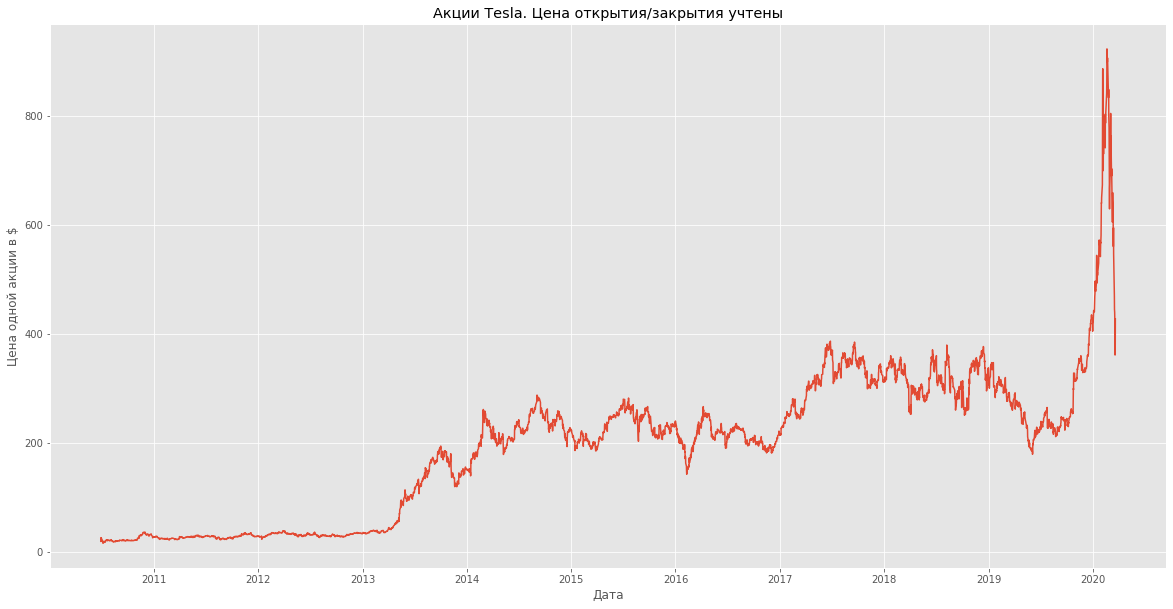

In [10]:
plt.figure(figsize=(20, 10))
plt.title('Акции Tesla. Цена открытия/закрытия учтены')
plt.xlabel('Дата')
plt.ylabel('Цена одной акции в $')
plt.plot(x, y)
plt.show()

In [9]:
fft_coef = np.fft.rfft(y)
ps_coef = np.abs(fft_coef)**2

In [10]:
x_log = np.log(np.arange(1, len(ps_coef)+1)).reshape(-1, 1)
y_log = np.log(ps_coef).reshape(-1, 1)

In [11]:
lr = LinearRegression()
lr.fit(x_log, y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lr.coef_

array([[-1.82727983]])

### КФ угла наклона -1.82

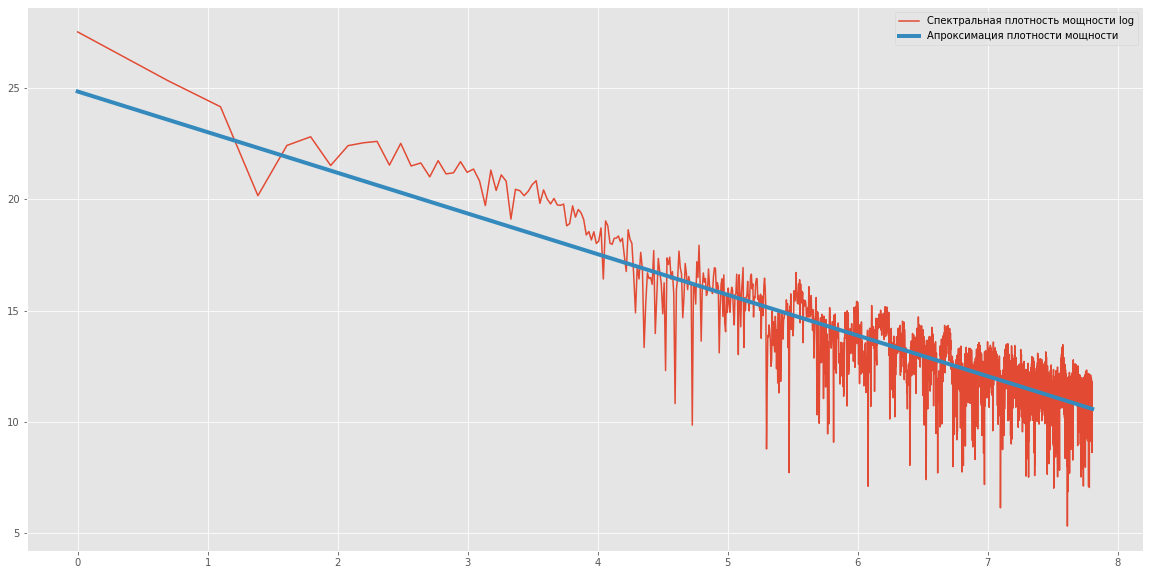

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(x_log, y_log, label='Cпектральная плотность мощности log')
plt.plot(x_log, lr.predict(x_log), label=f'Апроксимация плотности мощности', linewidth=4)
plt.legend()
plt.show()

In [11]:
import nolds

In [15]:
y

array([ 19.      ,  23.889999,  25.790001, ..., 361.220001, 374.700012,
       427.640015])

In [48]:
make_sin = lambda x: x

In [61]:
nolds.hurst_rs([make_sin(x) for x in np.linspace(1, 1000, 1000000)])

0.9729264444992973